In [1]:
import pandas as pd
data = pd.read_csv('preprocessed_student_data.csv')

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996054 entries, 0 to 2996053
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sessionId          int64  
 1   timestamp          int64  
 2   x                  float64
 3   y                  float64
 4   z                  float64
 5   ppgValue           float64
 6   hr                 float64
 7   hrIbi              float64
 8   hrStatus           float64
 9   ibiStatus          float64
 10  notification       float64
 11  engagement         float64
 12  affect             object 
 13  context            object 
 14  timestamp_seconds  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 342.9+ MB


In [4]:
# Assuming normalized_student_data is your DataFrame
# Decide on a downsampling rate; for example, keep every 5th sample
downsampling_rate = 5

# Use the modulo operator to filter rows
downsampled_data = data.iloc[::downsampling_rate]

downsampled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599211 entries, 0 to 2996050
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sessionId          599211 non-null  int64  
 1   timestamp          599211 non-null  int64  
 2   x                  599211 non-null  float64
 3   y                  599211 non-null  float64
 4   z                  599211 non-null  float64
 5   ppgValue           599211 non-null  float64
 6   hr                 599211 non-null  float64
 7   hrIbi              599211 non-null  float64
 8   hrStatus           599211 non-null  float64
 9   ibiStatus          599211 non-null  float64
 10  notification       0 non-null       float64
 11  engagement         0 non-null       float64
 12  affect             388601 non-null  object 
 13  context            397878 non-null  object 
 14  timestamp_seconds  599211 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 

In [5]:
from sklearn.model_selection import train_test_split

# Assuming 'sessionId' is the column that identifies sessions
session_ids = downsampled_data['sessionId'].unique()
train_sessions, test_sessions = train_test_split(session_ids, test_size=0.2, random_state=42)

train_data = downsampled_data[downsampled_data['sessionId'].isin(train_sessions)]
temp_test_data = downsampled_data[downsampled_data['sessionId'].isin(test_sessions)]

# Optionally, further split the test set into validation and test sets
valid_sessions, test_sessions = train_test_split(temp_test_data['sessionId'].unique(), test_size=0.5, random_state=42)
valid_data = temp_test_data[temp_test_data['sessionId'].isin(valid_sessions)]
test_data = temp_test_data[temp_test_data['sessionId'].isin(test_sessions)]


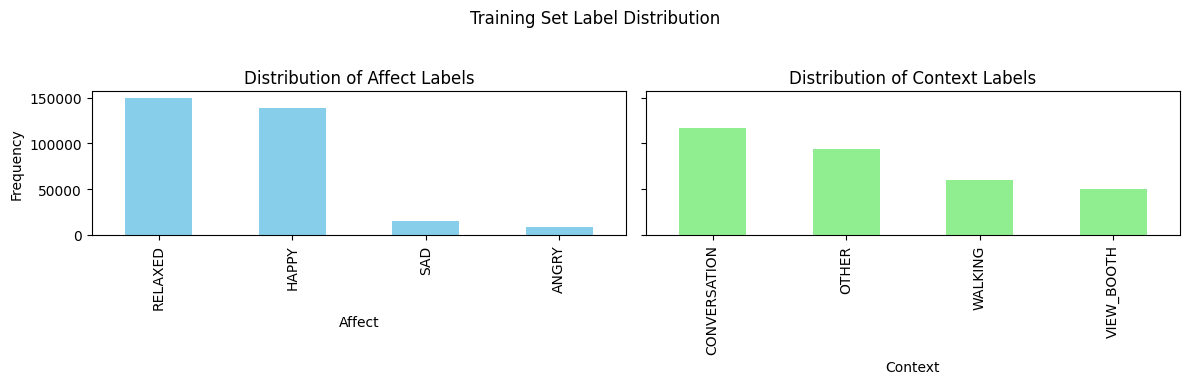

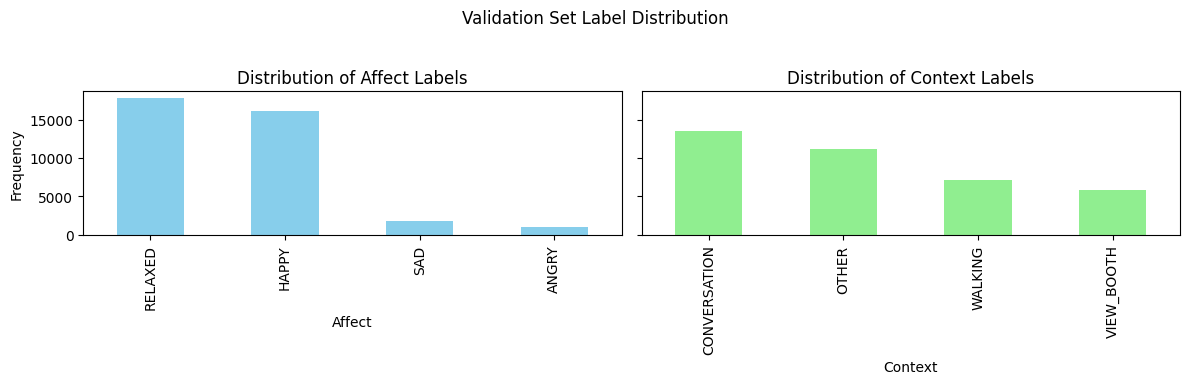

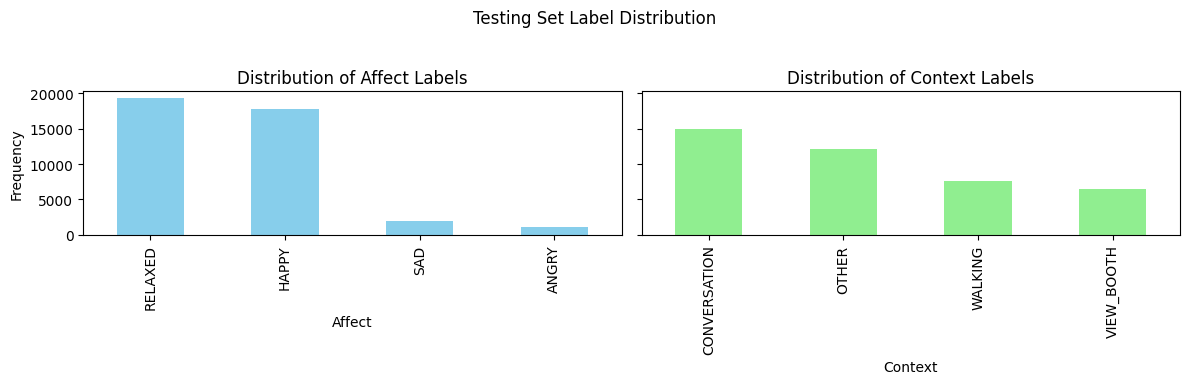

In [7]:
import matplotlib.pyplot as plt

# Assuming you have training, validation, and testing sets named train_data, val_data, test_data
# And assuming 'affect' and 'context' are your label columns

def plot_label_distribution(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    # Plot distribution of 'affect' labels
    data['affect'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
    axs[0].set_title('Distribution of Affect Labels')
    axs[0].set_xlabel('Affect')
    axs[0].set_ylabel('Frequency')

    # Plot distribution of 'context' labels
    data['context'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
    axs[1].set_title('Distribution of Context Labels')
    axs[1].set_xlabel('Context')
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Visualize label distribution for each set
plot_label_distribution(train_data, 'Training Set Label Distribution')
plot_label_distribution(valid_data, 'Validation Set Label Distribution')
plot_label_distribution(test_data, 'Testing Set Label Distribution')


In [20]:
import pandas as pd

# Load your CSV data into a DataFrame
data_path = 'preprocessed_student_data.csv'
data = pd.read_csv(data_path)

# Selecting features for X
features = ['x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi', 'hrStatus', 'ibiStatus']
X = data[features]

# For multi-output targets:
y_multi = data[['context', 'affect']]

# For separate models:
y_context = data['context']
y_affect = data['affect']


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Drop rows with NaN values in either features or target
cleaned_data = data.dropna(subset=features + ['context', 'affect'])

X = cleaned_data[features]
y_context = cleaned_data['context']

X_train, X_test, y_train, y_test = train_test_split(X, y_context, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

CONVERSATION       0.95      0.98      0.97     70724
       OTHER       0.97      0.96      0.97     52705
  VIEW_BOOTH       0.98      0.93      0.96     23645
     WALKING       0.97      0.95      0.96     40155

    accuracy                           0.96    187229
   macro avg       0.97      0.96      0.96    187229
weighted avg       0.97      0.96      0.96    187229



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Drop rows with NaN values in either features or target
cleaned_data = data.dropna(subset=features + ['context', 'affect'])

X = cleaned_data[features]
# TODO Does not work yet.
y_multi = cleaned_data['context', 'affect'] 

X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


KeyError: ('context', 'affect')